In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import rosen, rosen_der, rosen_hess
import time
import matplotlib.pyplot as plt

Cette section présente plusieurs fonctions test couramment utilisées pour évaluer les algorithmes d'optimisation. Chaque fonction est accompagnée de son gradient et de sa matrice Hessienne, permettant ainsi de tester différents aspects des algorithmes d'optimisation. Les fonctions test incluent la fonction Sphere, Booth, Matyas et Rosenbrock.




1.   **La fonction Sphere est définie par :**

\begin{equation}
    f(\mathbf{x}) = \sum_{i=1}^{n} x_i^2\,, \quad \mathbf{x} \in \mathbb{R}^n
\end{equation}

*  *Maximum global :* $f(x_1, \ldots, x_n) = f(0, \ldots, 0) = 0$
*  *Objectif :* Tester la capacité des algorithmes à converger vers l'origine et minimiser une fonction quadratique simple.



2.   **La fonction Booth est définie par :**

\begin{equation}
    f(\mathbf{x}) = (x_1 + 2 x_2 - 7)^2 + (2 x_1 + x_2 - 5)^2\,, \quad \mathbf{x} \in \mathbb{R}^2
\end{equation}
*  *Maximum global :* $f(x_1, x_2) = f(1, 3) = 0 $.
*  *Objectif :* Évaluer la capacité des algorithmes à gérer des fonctions quadratiques non convexes avec des points de minimum bien définis.

3.   **La fonction Matyas est définie par :**

\begin{equation}
    f(\mathbf{x}) = 0.26 (x_1^2 + x_2^2) - 0.48 x_1 x_2\,, \quad \mathbf{x} \in \mathbb{R}^2
\end{equation}

*  *Maximum global :* $f(x_1, x_2) = f(0, 0) = 0 $.
*  *Objectif :* Tester les algorithmes d'optimisation sur une fonction quadratique avec des interactions entre les variables.



4.   **La fonction Rosenbrock est définie par :**

\begin{equation}
    f(\mathbf{x}) = \sum_{i=1}^{n-1} [100 (x_{i+1} - x_i^2)^2 + (x_i - 1)^2]\,, \quad \mathbf{x} \in \mathbb{R}^n
\end{equation}
*  *Maximum global :* $f(x_1,\ldots, x_n) = f(1,\ldots, 1) = 0 $.
*  *Objectif :*  Évaluer les algorithmes d'optimisation sur une fonction complexe avec des interactions non linéaires entre les variables.

Les fonctions définies ici permettent de tester et d'évaluer les performances des algorithmes d'optimisation. Elles aident à vérifier la convergence des algorithmes vers les minima globaux et à évaluer leur capacité à gérer différentes structures de fonctions, telles que des fonctions quadratiques, des fonctions avec interactions entre variables, et des fonctions non linéaires complexes.

In [ ]:
#coder les fonctions test

class Sphere:
  def __init__(self):
    self.f = lambda x : sum([xi**2 for xi in x])
    self.grad = lambda x : np.array([2*xi for xi in x])
    self.hessian = lambda x: np.diag([2 for _ in range(len(x))])
    print('le min est: [0, ..., 0] et f(x) = 0')

class Booth:
  def __init__(self):
    self.f = lambda x : (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
    #self.f = lambda x, y : (x + 2*y - 7)**2 + (2*x + y - 5)**2
    self.grad = lambda x : np.array([10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38])
    #self.grad = lambda x, y : np.array([10*x + 8*y - 34, 8*x + 10*xy - 38])
    self.hessian = lambda x: np.array([[10, 8], [8, 10]])
    print('le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10')


class Matyas:
  def __init__(self):
    self.f = lambda x : 0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]
    self.grad = lambda x : np.array([0.52*x[0] - 0.48*x[1], 0.52*x[1] - 0.48*x[0]])
    self.hessian = lambda x: np.array([[0.52, -0.48], [-0.48, 0.52]])
    print('le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10')


class Rosenbrock:
  def __init__(self):
    #self.f = lambda x : np.sum([(1 - x[i])**2 + 100 * (x[i+1] - x[i]**2)**2 for i in range(len(x)-1)])
    self.f = lambda x : rosen(x)
    self.grad = lambda x : rosen_der(x)
    self.hessian = lambda x : rosen_hess(x)
    print('le min est: [1, ...,  1] et f(1, ...,  1) = 0')

La méthode de line search (recherche le long d'une ligne) est une stratégie d'optimisation qui consiste à choisir une direction $\mathbf{p}_k$ à partir de l'itération actuelle $\mathbf{x}_k$ et à rechercher un nouvel itéré ayant une valeur de fonction plus basse le long de cette direction. On définit alors un problème de minimisation unidimensionnel pour trouver la longueur de pas $\alpha$ :

\begin{equation}
\min_{\alpha > 0} f(\mathbf{x}_k + \alpha \mathbf{p}_k) \tag{1}
\end{equation}

En résolvant (1) de manière exacte, on tirerait le maximum de bénéfice de la direction $\mathbf{p}_k$. Toutefois, une minimisation exacte peut être coûteuse et généralement inutile. Ainsi, l'algorithme de line search génère un nombre limité de longueurs de pas d'essai jusqu'à en trouver une qui approche de manière lâche le minimum de (1). À ce nouveau point $\mathbf{x}_{k+1}$, une nouvelle direction de recherche et une nouvelle longueur de pas sont calculées, et le processus est répété.

## Algorithmes de Line Search

1.  *Gradient Descendant:*
Le gradient descendant est basé sur la direction du gradient de la fonction $f$. À chaque itération, la direction de recherche est donnée par :

\begin{equation}
\mathbf{p}_k = -\nabla f(\mathbf{x}_k),
\end{equation}

$\hspace{20pt}$où $\nabla f(\mathbf{x}_k)$ est le gradient de $f$ à $\mathbf{x}_k$. Le but est de minimiser $f$ en se déplaçant dans la direction opposée au gradient, car c'est là que la $\hspace{20pt}$fonction diminue le plus rapidement.

\\

2.  *Méthode de Newton:*
La méthode de Newton utilise une approximation de la fonction objective par une série de Taylor d'ordre deux :

\begin{equation}
f(\mathbf{x}_k + \mathbf{p}) \approx f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)^T \mathbf{p} + \frac{1}{2} \mathbf{p}^T \nabla^2 f(\mathbf{x}_k) \mathbf{p}.
\end{equation}

$\hspace{20pt}$En minimisant cette approximation, on obtient la direction de Newton :

\begin{equation}
\mathbf{p}_k = -(\nabla^2 f(\mathbf{x}_k))^{-1} \nabla f(\mathbf{x}_k),
\end{equation}

$\hspace{20pt}$sous l'hypothèse que la matrice Hessienne $\nabla^2 f(\mathbf{x}_k)$ est définie positive.

\\

3. *Méthode BFGS:*
La méthode BFGS (Broyden-Fletcher-Goldfarb-Shanno) est une méthode quasi-Newton qui construit une approximation de la Hessienne à partir des gradients. À chaque itération, elle met à jour une matrice $\mathbf{B}_k$ qui approxime $\nabla^2 f(\mathbf{x}_k)$ sans avoir à calculer la Hessienne exacte. La direction de recherche est alors :

\begin{equation}
\mathbf{p}_k = -\mathbf{B}_k^{-1} \nabla f(\mathbf{x}_k).
\end{equation}

\\


Les méthodes de line search offrent des approches efficaces pour résoudre des problèmes d'optimisation non contraints. Le choix de la direction de recherche $\mathbf{p}_k$ et de la longueur de pas $\alpha_k$ est crucial pour garantir la convergence rapide vers un minimum local de la fonction $f$.

\\

## Convergence des Algorithmes:

La convergence des algorithmes d'optimisation est justifiée par le théorème suivant :

$\hspace{20pt}$*Théorème:* Si $x^*$ est un minimiseur local et $f$ est continûment dérivable dans un $\hspace{20pt}$voisinage ouvert de $x^*$, alors $\nabla f(x^*) \neq 0$.

Ainsi, lorsque $\|\nabla f(\mathbf{x}_k)\| \to 0$, l'algorithme s'arrête, indiquant que $\mathbf{x}_k$ approche un minimum local.

In [ ]:
def algo_gradient(func, grad, x_k, epsilon, step):
    """
    Algorithme de gradient pour minimiser une fonction objectif.

    :param func: Fonction objectif à minimiser.
    :param grad: Fonction qui calcule le gradient de la fonction objectif.
    :param x_k: Point de départ.
    :param epsilon: Critère d'arrêt pour la norme du gradient.
    :param step: Fonction lambda ou valeur constante pour déterminer la taille du pas.
    :return: Point final après convergence.
    """
    while np.linalg.norm(grad(x_k)) > epsilon:  # Critère d'arrêt
        pk = -grad(x_k)

        if callable(step):  # Si step est une fonction lambda, on l'appelle pour obtenir alpha
            alpha = step(x_k, pk)
        else:  # Sinon, on utilise step comme une valeur constante
            alpha = step

        # Mise à jour du point x_k
        x_k = x_k + alpha * pk
    x_k = [f"{val:.16f}" for val in x_k]
    return x_k



def newtone(func, grad, hessian, x_k, epsilon, step):
   """
    Algorithme de Newton pour minimiser une fonction objectif.

    :param func: Fonction objectif à minimiser.
    :param grad: Fonction qui calcule le gradient de la fonction objectif.
    :param hessian: Fonction qui calcule la matrice Hessienne de la fonction objectif.
    :param x_k: Point de départ.
    :param epsilon: Critère d'arrêt pour la norme du gradient.
    :param step: Fonction lambda ou valeur constante pour déterminer la taille du pas.
    :return: Point final après convergence.
   """
   while np.linalg.norm(grad(x_k)) >  epsilon: #critere d'arret
     pk = -np.linalg.inv(hessian(x_k))@grad(x_k)

     if callable(step):  # Si step est une fonction lambda, on l'appelle pour obtenir alpha
        alpha = step(x_k, pk)
     else:  # Sinon, on utilise step comme une valeur constante
        alpha = step

     #3nouvelle itéré
     x_k = x_k + alpha * pk

   x_k = [f"{val:.16f}" for val in x_k]
   return x_k



def bfgs(func, grad, x_k, epsilon, step):
   """
    Algorithme BFGS pour minimiser une fonction objectif.

    :param func: Fonction objectif à minimiser.
    :param grad: Fonction qui calcule le gradient de la fonction objectif.
    :param x_k: Point de départ.
    :param epsilon: Critère d'arrêt pour la norme du gradient.
    :param step: Fonction lambda ou valeur constante pour déterminer la taille du pas.
    :return: Point final après convergence.
   """
   #initialisation de l'approximation de la matrice hessian
   b_k = np.eye(len(x_k))

   while np.linalg.norm(grad(x_k)) >  epsilon: #critere d'arret
     pk = np.dot(np.linalg.inv(b_k), grad(x_k)) #vecteur directionnel
     if callable(step):  # Si step est une fonction lambda, on l'appelle pour obtenir alpha
        alpha = step(x_k, pk)
     else:  # Sinon, on utilise step comme une valeur constante
        alpha = step

     #1) nouvelle itéré
     x_kplus1 = x_k - alpha * pk

     #update matrice bk
     y_k = grad(x_kplus1) - grad(x_k)
     s_k = x_kplus1 - x_k
     s_k = s_k[:, np.newaxis]  # (n, 1)
     y_k = y_k[:, np.newaxis]  # (n, 1)


     b_k = b_k  -  (b_k @ s_k @ s_k.T @ b_k) / (s_k.T @ b_k @ s_k)  +  np.dot(y_k, y_k.T) / (y_k.T @ s_k)
     #reinitialisation de x_k
     x_k = x_kplus1

   x_k = [f"{val:.16f}" for val in x_k]
   return x_k


# algo gradient , newtone et bfgs test

In [ ]:
epsilon = 1e-10


sphere = Sphere()
x_0 = np.array([100, 10000, 3.0, 1, 5])
algo_grad = algo_gradient(sphere.f, sphere.grad, x_0, epsilon, 0.25)
print('fonction sphere')
print("Résultat final:", algo_grad)
print('\n \n \n')


x_0 = np.array([2, 4])
booth = Booth()
grad_booth = algo_gradient(booth.f, booth.grad, x_0, epsilon, 0.001)
print('fonction booth')
print("Résultat final:", grad_booth)
print('\n \n \n')


matyas = Matyas()
grad_matyas = algo_gradient(matyas.f, matyas.grad, x_0, epsilon,0.05)
print('fonction matyas')
print("Résultat final:", grad_matyas)
print('\n \n \n')


x_0 = np.array([3, 3, 3])
rosenbrock = Rosenbrock()
t0 = time.time()
min = algo_gradient(rosenbrock.f, rosenbrock.grad, x_0, epsilon, 0.00055)
t1 = time.time()
print('fonction rosenbrock')
print("Résultat final:", min)
print(f"Time = {t1 - t0}")


le min est: [0, ..., 0] et f(x) = 0
fonction sphere
Résultat final: ['0.0000000000003553', '0.0000000000355271', '0.0000000000000107', '0.0000000000000036', '0.0000000000000178']

 
 

le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10
fonction booth
Résultat final: ['1.0000000000039173', '3.0000000000039213']

 
 

le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10
fonction matyas
Résultat final: ['0.0000000017658246', '0.0000000017658246']

 
 

le min est: [1, ...,  1] et f(1, ...,  1) = 0
fonction rosenbrock
Résultat final: ['0.9999999999542477', '0.9999999999083210', '0.9999999998162055']
Time = 17.40215301513672


In [ ]:
sphere = Sphere()
x_0 = np.array([1.0, 2.0, 3.0, 1, 5])
min = newtone(sphere.f, sphere.grad, sphere.hessian, x_0, epsilon, 1)
print('fonction sphere')
print("Résultat final:", min)
print('\n \n \n')


x_0 = np.array([2, 4])
booth = Booth()
min = newtone(booth.f, booth.grad, booth.hessian, x_0, epsilon, 1)
print('fonction booth')
print("Résultat final:", min)
print('\n \n \n')


matyas = Matyas()
min = newtone(matyas.f, matyas.grad, matyas.hessian, x_0, epsilon, 1)
print('fonction matyas')
print("Résultat final:", min)
print('\n \n \n')


x_0 = np.array([2, 3])
rosenbrock = Rosenbrock()
min = newtone(rosenbrock.f, rosenbrock.grad, rosenbrock.hessian, x_0, epsilon, 1)
print('fonction rosenbrock')
print("Résultat final:", min)


le min est: [0, ..., 0] et f(x) = 0
fonction sphere
Résultat final: ['0.0000000000000000', '0.0000000000000000', '0.0000000000000000', '0.0000000000000000', '0.0000000000000000']

 
 

le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10
fonction booth
Résultat final: ['0.9999999999999998', '3.0000000000000000']

 
 

le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10
fonction matyas
Résultat final: ['0.0000000000000016', '0.0000000000000022']

 
 

le min est: [1, ...,  1] et f(1, ...,  1) = 0
fonction rosenbrock
Résultat final: ['1.0000000000028562', '1.0000000000057121']


In [ ]:

sphere = Sphere()
x_0 = np.array([1.0, 2.0, 3.0, 1, 5])
min = bfgs(sphere.f, sphere.grad, x_0, epsilon, 1)
print('fonction sphere')
print("Résultat final:", min)
print('\n \n \n')


x_0 = np.array([2, 4])
booth = Booth()
min = bfgs(booth.f, booth.grad, x_0, epsilon, 1)
print('fonction booth')
print("Résultat final:", min)
print('\n \n \n')


matyas = Matyas()
min = bfgs(matyas.f, matyas.grad, x_0, epsilon, 1)
print('fonction matyas')
print("Résultat final:", min)
print('\n \n \n')



x_0 = np.array([2, 3])
rosenbrock = Rosenbrock()
min = bfgs(rosenbrock.f, rosenbrock.grad, x_0, epsilon, 1)
print('fonction rosenbrock')
print("Résultat final:", min)



le min est: [0, ..., 0] et f(x) = 0
fonction sphere
Résultat final: ['0.0000000000000002', '0.0000000000000004', '-0.0000000000000004', '0.0000000000000000', '0.0000000000000000']

 
 

le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10
fonction booth
Résultat final: ['0.9999999999999858', '3.0000000000000142']

 
 

le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10
fonction matyas
Résultat final: ['0.0000000000008312', '0.0000000000011101']

 
 

le min est: [1, ...,  1] et f(1, ...,  1) = 0
fonction rosenbrock
Résultat final: ['0.9999999999997330', '0.9999999999994632']


# conditions de wolfe


In [ ]:
class Wolf:
    def __init__(self, f, grad, alpha_max=1.0, c1=1e-4, c2=0.9):
        """
        Initialisation de la classe pour la recherche de ligne avec rétrogradation utilisant les conditions de Wolfe.

        :param f: Fonction objectif à minimiser.
        :param grad: Fonction qui calcule le gradient de la fonction objectif.
        :param alpha_max: Valeur initiale de α.
        :param c1: Paramètre pour la condition d'Armijo (condition de suffisance de la diminution).
        :param c2: Paramètre pour la condition de Wolfe (condition de courbure).
        """
        self.f = f
        self.grad = grad
        self.alpha_max = alpha_max
        self.c1 = c1
        self.c2 = c2

        if (c2 < c1) or (c1 <= 0) or (alpha_max <= 0):
            raise ValueError('Les conditions 0 < c1 < c2 < 1 ne sont pas respectées ou alpha_max est inférieur ou égal à zéro.')

    def backtracking(self, xk, pk, rho=0.5):
        """
        Calcule la taille du pas α en utilisant la méthode de recherche de ligne avec rétrogradation.

        :param xk: Point actuel.
        :param pk: Direction de descente.
        :param rho: Facteur de réduction pour la rétrogradation.
        :return: Taille du pas α.
        """
        alpha = self.alpha_max
        while self.f(xk + alpha * pk) > self.f(xk) + self.c1 * alpha * np.dot(self.grad(xk), pk):
            alpha = alpha * rho
        return alpha

    def interpolation(self, xk, pk):
        """
        Calcule la taille du pas α en utilisant la méthode d'interpolation pour satisfaire les conditions de Wolfe.

        :param xk: Point actuel.
        :param pk: Direction de descente.
        :return: Taille du pas α.
        """
        if (self.c2 < self.c1) or (self.c1 <= 0) or (self.alpha_max <= 0):
            raise ValueError('Les conditions 0 < c1 < c2 < 1 ne sont pas respectées ou alpha_max est inférieur ou égal à zéro.')

        # Suite de α
        alpha = np.linspace(1e-16, self.alpha_max, 10)

        # Définition de la fonction phi(α) et sa dérivée
        phi = lambda alpha: self.f(xk + alpha * pk)
        d_phi = lambda alpha: np.dot(self.grad(xk + alpha * pk), pk)

        phi_0 = phi(0)
        d_phi_0 = d_phi(0)

        def zoom(alpha_lo, alpha_hi):
            """Recherche dans un intervalle plus petit en satisfaisant les conditions de Wolfe."""
            while True:
                alpha_j = (alpha_hi + alpha_lo) / 2
                if (phi(alpha_j) > phi_0 + self.c1 * alpha_j * d_phi_0) or (phi(alpha_j) >= phi(alpha_lo)):
                    alpha_hi = alpha_j
                    if abs(alpha_hi - alpha_lo) < 1e-8:
                        return (alpha_hi + alpha_lo) / 2
                else:
                    d_phi_j = d_phi(alpha_j)
                    if abs(d_phi_j) <= -self.c2 * d_phi_0:
                        return alpha_j
                    if d_phi_j * (alpha_hi - alpha_lo) >= 0:
                        alpha_hi = alpha_lo
                    alpha_lo = alpha_j

        # Boucle pour vérifier si alpha respecte les conditions de Wolfe
        for i in range(len(alpha)):
            if (phi(alpha[i]) > phi_0 + self.c1 * alpha[i] * d_phi_0) or (i > 1 and phi(alpha[i]) >= phi(alpha[i - 1])):
                return zoom(alpha[i - 1], alpha[i])
            if abs(d_phi(alpha[i])) <= -self.c2 * d_phi_0:
                return alpha[i]
            if d_phi(alpha[i]) >= 0:
                return zoom(alpha[i], alpha[i - 1])

        return 1  # Si aucun autre alpha n'est trouvé, on retourne 1

Algo backtracking

In [ ]:

epsilon = 1e-10

# Fonction Sphere
sphere = Sphere()
x_0 = np.array([100, 100, 100.0, 100, 100])
wolf_sphere = Wolf(sphere.f, sphere.grad, alpha_max=1.0, c1=1e-4, c2=0.9)
step_sphere = lambda xk, pk: wolf_sphere.backtracking(xk, pk)
algo_grad_sphere = algo_gradient(sphere.f, sphere.grad, x_0, epsilon, step_sphere)
print('Fonction Sphere')
print("Résultat final:", algo_grad_sphere)
print('\n \n \n')

# Fonction Sphere
sphere = Sphere()
x_0 = np.array([100, 100, 100.0, 100, 100])
wolf_sphere = Wolf(sphere.f, sphere.grad, alpha_max=1.0, c1=1e-4, c2=0.9)
step_sphere = lambda xk, pk: wolf_sphere.backtracking(xk, pk)
algo_grad_sphere = newtone(sphere.f, sphere.grad, sphere.hessian, x_0, epsilon, step_sphere)
print('Fonction Sphere')
print("Résultat final:", algo_grad_sphere)
print('\n \n \n')

# Fonction Booth
x_0 = np.array([2, 4])
booth = Booth()
wolf_booth = Wolf(booth.f, booth.grad, alpha_max=1.0, c1=1e-4, c2=0.9)
step_booth = lambda xk, pk: wolf_booth.backtracking(xk, pk)
grad_booth = algo_gradient(booth.f, booth.grad, x_0, epsilon, step_booth)
print('Fonction Booth')
print("Résultat final:", grad_booth)
print('\n \n \n')

# Fonction Matyas
x_0 = np.array([2, 3])
matyas = Matyas()
wolf_matyas = Wolf(matyas.f, matyas.grad, alpha_max=1, c1=1e-4, c2=0.9)
step_matyas = lambda xk, pk: wolf_matyas.backtracking(xk, pk)
grad_matyas = algo_gradient(matyas.f, matyas.grad, x_0, epsilon, step_matyas)
print('Fonction Matyas')
print("Résultat final:", grad_matyas)
print('\n \n \n')

# Fonction Rosenbrock
x_0 = np.array([10, 10, 10])
rosenbrock = Rosenbrock()
wolf_rosenbrock = Wolf(rosenbrock.f, rosenbrock.grad, alpha_max=0.0005, c1=1e-4, c2=0.9)
step_rosenbrock = lambda xk, pk: wolf_rosenbrock.backtracking(xk, pk)
t0 = time.time()
min_rosenbrock = algo_gradient(rosenbrock.f, rosenbrock.grad, x_0, epsilon, step_rosenbrock)
t1 = time.time()
print('Fonction Rosenbrock')
print("Résultat final:", min_rosenbrock)
print(f"Time = {t1 - t0}")



le min est: [0, ..., 0] et f(x) = 0
Fonction Sphere
Résultat final: ['0.0000000000000000', '0.0000000000000000', '0.0000000000000000', '0.0000000000000000', '0.0000000000000000']

 
 

le min est: [0, ..., 0] et f(x) = 0
Fonction Sphere
Résultat final: ['0.0000000000000000', '0.0000000000000000', '0.0000000000000000', '0.0000000000000000', '0.0000000000000000']

 
 

le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10
Fonction Booth
Résultat final: ['0.9999999999981810', '2.9999999999981810']

 
 

le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10
Fonction Matyas
Résultat final: ['0.0000000017067405', '0.0000000017067405']

 
 

le min est: [1, ...,  1] et f(1, ...,  1) = 0
Fonction Rosenbrock
Résultat final: ['0.9999999999542472', '0.9999999999083199', '0.9999999998162032']
Time = 15.012542486190796


Conditions de wolf par interpolation

In [ ]:
epsilon = 1e-10



# Fonction Sphere
sphere = Sphere()
x_0 = np.array([3, 2.0, 3.0, 1, 5])
step_sphere = lambda xk, pk: wolf_sphere.interpolation(xk, pk)
algo_grad_sphere = newtone(sphere.f, sphere.grad, sphere.hessian, x_0, epsilon, step_sphere)
print('Fonction Sphere')
print("Résultat final:", algo_grad_sphere)
print('\n \n ')


# Fonction Booth
x_0 = np.array([2, 4])
booth = Booth()
step_booth = lambda xk, pk: wolf_booth.interpolation(xk, pk)
grad_booth = algo_gradient(booth.f, booth.grad, x_0, epsilon, step_booth)
print('Fonction Booth')
print("Résultat final:", grad_booth)
print('\n \n \n')

# Fonction Matyas
x_0 = np.array([2, 3])
matyas = Matyas()
step_matyas = lambda xk, pk: wolf_matyas.interpolation(xk, pk)
grad_matyas = algo_gradient(matyas.f, matyas.grad, x_0, epsilon, step_matyas)
print('Fonction Matyas')
print("Résultat final:", grad_matyas)
print('\n \n \n')

# Fonction Rosenbrock
x_0 = np.array([3, 3, 3])
rosenbrock = Rosenbrock()
step_rosenbrock = lambda xk, pk: wolf_rosenbrock.interpolation(xk, pk)
t0 = time.time()
min_rosenbrock = algo_gradient(rosenbrock.f, rosenbrock.grad, x_0, epsilon, step_rosenbrock)
t1 = time.time()
print('Fonction Rosenbrock')
print("Résultat final:", min_rosenbrock)
print(f"Time = {t1 - t0}")


le min est: [0, ..., 0] et f(x) = 0
Fonction Sphere
Résultat final: ['0.0000000000211773', '0.0000000000141182', '0.0000000000211773', '0.0000000000070591', '0.0000000000352956']

 
 
le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10
Fonction Booth
Résultat final: ['0.9999999999999982', '2.9999999999999982']

 
 

le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10
Fonction Matyas
Résultat final: ['0.0000000017647207', '0.0000000017647207']

 
 

le min est: [1, ...,  1] et f(1, ...,  1) = 0
Fonction Rosenbrock
Résultat final: ['1.0000000000256468', '1.0000000000512284', '1.0000000001025378']
Time = 1.2098114490509033


# Derivative-Free Optimization algo

L'algorithme optimise une fonction $f(x)$ sans nécessiter de dérivées. À chaque itération, il évalue $f$ dans plusieurs directions $p \in D_k$ autour du point courant $x_k$, en utilisant un pas $\gamma_k$.


1.   *Initialisation:*
*   Choisir $x_0$, $\gamma_0$, et un ensemble de directions $D_0$.


2.   *Évaluation des points candidats:*
*    Pour chaque $p \in D_k$, calculer $x_k + \gamma_k p$.
*     Si $f(x_k + \gamma_k p) < f(x_k) - \rho(\gamma_k)$, adopter  $x_{k+1} = x_k + \gamma_k p$ et éventuellement augmenter $\gamma_k$.


3.   *Réduction du pas:*
*    Si aucune direction ne diminue suffisamment $f$, réduire $\gamma_k$ en le multipliant par $\theta_k$ avec $0 < \theta_k < 1$.


4.   *Arrêt:*
*    L'algorithme s'arrête lorsque $\gamma_k < \gamma_{\text{tol}}$.


**Conditions pour la validité:**

*    *Direction de descente:* Il existe $p \in D_k$ tel que
\begin{equation}
\cos\theta = \frac{- \nabla f_k^T p}{\|\nabla f_k\|\|p\|} > \delta.
\end{equation}

*    *Longueur des directions:*
\begin{equation}
\exists \, \beta_{\text{min}}, \beta_{\text{max}} > 0, \quad
\beta_{\text{min}} \leq \|p\| \leq \beta_{\text{max}}, \quad \forall p \in D_k.
\end{equation}

*    *Diminution suffisante:*
\begin{equation}
f(x_k + \gamma_k p) < f(x_k) - \rho(\gamma_k), \quad avec \quad \frac{\rho(t)}{t} \to 0 \quad \text{lorsque} \quad t \to 0
\end{equation}
\begin{equation}
\frac{\rho(t)}{t} \to 0 \quad \text{lorsque} \quad t \to 0.
\end{equation}


In [ ]:
#pattern search
def set(n):
  D = np.vstack([np.eye(n), -np.eye(n)])
  return D


def pattern_search(f, x_0, nombre_iteration):
  """
    Algorithme de recherche par patron pour minimiser une fonction sans dérivées.

    :param f: Fonction objectif à minimiser.
    :param x_0: Point de départ pour la recherche.
    :param nombre_iteration: Nombre maximum d'itérations à effectuer.
    :return: Point final après convergence, formaté avec 16 décimales.
  """
  gamma_min = 1e-8
  theta_max = 0.5
  rho = lambda t : 1e-4 * t**(3/2)

  gamma = 1
  D = set(len(x_0))
  iteration = 0
  while (gamma > gamma_min) and (iteration < nombre_iteration):
    xk = False
    for pk in D:

      if (f(x_0 - gamma*pk) < (f(x_0) - rho(gamma))):
        xk = True
        x_0 = x_0 - gamma*pk
        gamma *= 1.1

    if not xk:
      gamma *= theta_max
    iteration += 1

  print(f"Le nombre d'itération : {iteration}")
  x_0 = [f"{val:.16f}" for val in x_0]
  return x_0

In [ ]:
# Fonction Sphere
sphere = Sphere()
x_0 = np.array([100, 100, 100.0, 100, 100])
min = pattern_search(sphere.f, x_0, 10000)
print('Fonction Sphere')
print("Résultat final:", min)
print('\n \n \n')


x_0 = np.array([-2000, 1000])
booth = Booth()
min = pattern_search(booth.f, x_0, 10000)
print('fonction booth')
print("Résultat final:", min)
print('\n \n ')


# Fonction Matyas
x_0 = np.array([2, 3])
matyas = Matyas()
min = pattern_search(matyas.f, x_0, 10000)
print('Fonction Matyas')
print("Résultat final:", min)
print('\n \n \n')

# Fonction Rosenbrock
x_0 = np.array([10, 10, 10])
rosenbrock = Rosenbrock()
min = pattern_search(rosenbrock.f, x_0, 20000)
print('Fonction Rosenbrock')
print("Résultat final:", min)

le min est: [0, ..., 0] et f(x) = 0
Le nombre d'itération : 108
Fonction Sphere
Résultat final: ['-0.0000000144830664', '0.0000000115175886', '-0.0000000101728452', '0.0000000040777529', '0.0000000023947263']

 
 

le min est: [1, 3] et f(1, 3) = 0             -10<= x, y <= 10
Le nombre d'itération : 111
fonction booth
Résultat final: ['0.9999999830101313', '3.0000000143651491']

 
 
le min est: [0, 0] et f(0, 0) = 0             -10<= x, y <= 10
Le nombre d'itération : 123
Fonction Matyas
Résultat final: ['-0.0000004136703338', '-0.0000004143705779']

 
 

le min est: [1, ...,  1] et f(1, ...,  1) = 0
Le nombre d'itération : 11780
Fonction Rosenbrock
Résultat final: ['0.9999977656881633', '0.9999955338773080', '0.9999910642263564']


# least squares

Dans les problèmes de moindres carrés, la fonction objectif $ f(x) $ est définie comme suit :

\begin{equation}
f(x) = \frac{1}{2} \sum_{j=1}^{m} r_j^2(x)
\end{equation}

où chaque $ r_j(x) $ est un résidu lisse de $ r_j : \mathbb{R}^n \to \mathbb{R} $, formant ainsi un vecteur de résidus $ r(x) = (r_1(x), \dots, r_m(x))^T $.

On peut réécrire $ f(x) $ sous la forme :

\begin{equation}
f(x) = \frac{1}{2} \| r(x) \|_2^2
\end{equation}

Le gradient et la Hessienne de $ f $ se calculent respectivement par :

$$ \nabla f(x) = J(x)^T r(x), \quad \nabla^2 f(x) = J(x)^T J(x) + \sum_{j=1}^{m} r_j(x) \nabla^2 r_j(x) $$

où $ J(x) $ est la matrice jacobienne des résidus, composée des dérivées partielles $ \frac{\partial r_j(x)}{\partial x_i} $.Pour les least squares non linéaire, la méthode de Gauss-Newton exploite la structure de $ f(x) $, négligeant le second terme de la Hessienne $ \sum_{j=1}^{m} r_j(x) \nabla^2 r_j(x) $ lorsque les résidus sont petits ou quasi-affines. Ainsi, l'approximation de la Hessienne devient $ J(x)^T J(x) $.

Dans cette méthode, le pas de descente est obtenu en résolvant le système linéaire :

\begin{equation}
J(x_k)^T J(x_k) p_k = -J(x_k)^T r(x_k)
\end{equation}

Le critère de recherche linéaire est basé sur les conditions de Wolfe, avec un ajustement du pas $ \alpha_k $ via le backtracking.

La résolution itérative des moindres carrés utilise efficacement cette simplification de la Hessienne, accélérant la convergence dans les problèmes où les résidus sont proches de zéro.


In [ ]:
import autograd.numpy as np
from autograd import jacobian
from scipy.linalg import cholesky, solve_triangular



def gauss_newtone(r, j, x_0):
  """
    Algorithme de Gauss-Newton pour minimiser une fonction de moindres carrés.

    :param r: Fonction résiduelle, correspondant à la différence entre les prédictions du modèle et les données observées.
    :param j: Jacobienne de la fonction résiduelle, utilisée pour le calcul du gradient.
    :param x_0: Point de départ pour la minimisation (vecteur initial des paramètres du modèle).

    :return: Solution optimisée après convergence, les paramètres qui minimisent la somme des carrés des résidus.
  """
  grad_f_x0 = j(x_0).T @ r(x_0)

  grad_f = lambda x : j(x).T @ r(x)
  f = lambda x : np.linalg.norm(r(x)) ** 2
  wolf = Wolf(f, grad_f)
  i = 0
  while np.linalg.norm(grad_f_x0) > 1e-6 and i<100000:
    pk = np.linalg.solve(j(x_0).T @ j(x_0),  -j(x_0).T @ r(x_0))


    #trouver le alpha respecte les condition de wolf
    alpha = wolf.backtracking(x_0, pk)
    x_0 += alpha*pk
    grad_f_x0 = j(x_0).T @ r(x_0)
    i+=1

  print(f"Le nombre d'itération est de: {i}")
  print(f'norme du gradient: {np.linalg.norm(grad_f_x0)}')
  return x_0


\
**Modèle exponentiel :** $$y = a   \cdot e^{bx} $$

Le nombre d'itération est de: 24
norme du gradient: 6.898153515912435e-08


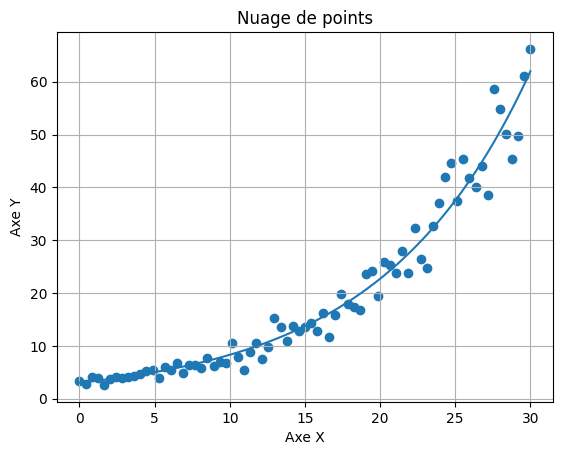

In [ ]:

a = np.random.normal(3, 0.5, 75)
b = np.random.normal(0.1, 0.001, 75)  # Valeurs plus petites pour éviter une explosion

# Générer les données
x_data = np.linspace(0, 30, 75)  # Réduire l'intervalle de x pour éviter des valeurs trop grandes
y_data = a * np.exp(b * x_data)



plt.scatter(x_data, y_data)

# Ajout de titres et de labels
plt.title('Nuage de points')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.grid()




def modele_exponentiel(coef):
  return y_data -(coef[0] * np.exp(coef[1] * x_data))

j = jacobian(modele_exponentiel)
#print(j(np.array([3,0.1])))

sol = gauss_newtone(modele_exponentiel, j, np.array([3.5, 0.5]))
#print(sol)

plt.plot(np.linspace(0, 30, 100),sol[0]*np.exp(sol[1]*np.linspace(0, 30, 100)))
# Affichage du nuage de points
plt.show()


**Modèle rationnel :** \begin{equation}
y = a + \frac{1}{b x}
\end{equation}

Le nombre d'itération est de: 6
norme du gradient: 3.609331107532551e-13


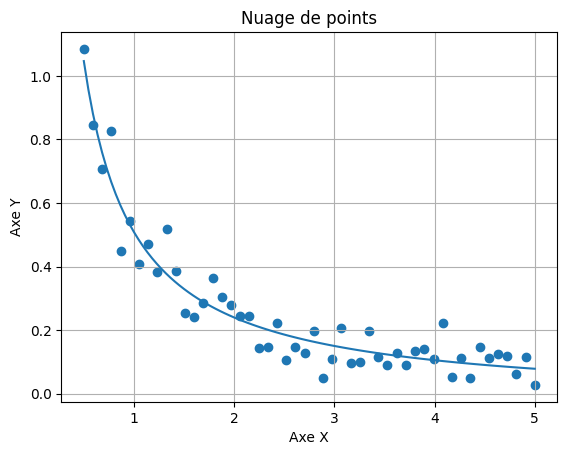

In [ ]:
a = np.random.normal(0, 0.05, 50)
b = np.random.normal(2, 0.25, 50)

# Générer les données
x_data = np.linspace(1/2, 5, 50)  # Réduire l'intervalle de x pour éviter des valeurs trop grandes
y_data = a + 1/(b*x_data)



plt.scatter(x_data, y_data)

# Ajout de titres et de labels
plt.title('Nuage de points')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.grid()




def modele_exponentiel(coef):
  return y_data -(coef[0] +  1/(coef[1] * x_data))

j = jacobian(modele_exponentiel)
#print(j(np.array([3,0.1])))

sol = gauss_newtone(modele_exponentiel, j, np.array([1.0, 3.0]))
#print(sol)

plt.plot(np.linspace(1/2, 5, 100),sol[0] + 1/(sol[1]*np.linspace(1/2, 5, 100)))
# Affichage du nuage de points
plt.show()


# Méthode du simplexe

La méthode du simplexe est une technique d'optimisation utilisée pour résoudre des problèmes de programmation linéaire. Elle vise à maximiser ou minimiser une fonction objective linéaire sous un ensemble de contraintes linéaires.
$$
\text{Maximiser } c^T x \quad \text{sous les contraintes} \quad Ax \leq b, \, x \geq 0
$$

où $x \in \mathbb{R}^n$, $c \in \mathbb{R}^n$, $A \in \mathbb{R}^{m \times n}$ et $b \in \mathbb{R}^m$.

1.
La méthode du simplexe, permet de naviguer dans les sommets d'un polytope défini par les contraintes du problème. Elle part d'un sommet de la solution feasible (acceptable) et se déplace le long des arêtes pour atteindre un sommet optimal, en suivant la direction qui améliore la fonction objective.

2. **Théorèmes de Base**
Théorème de l'existence de la solution optimale : Si un problème de programmation linéaire a une solution optimale, alors cette solution se trouve dans l'ensemble des sommets du polytope de solutions feasibles.
Théorème de la dualité : Chaque problème de programmation linéaire (problème primal) a un problème dual associé. Les valeurs optimales du primal et du dual sont égales sous certaines conditions, permettant d'analyser les solutions de manière complémentaire.

3. **Critère d'Optimalité**
Le critère d'optimalité dans la méthode du simplexe repose sur l'évaluation des coefficients de la fonction objective dans la base actuelle. Si tous les coefficients des variables non basiques sont non positifs (pour un problème de maximisation), la solution est optimale.

4. **Fonctionnement de la Méthode**
Initialisation : Commence avec une solution de base réalisable.
Itérations : À chaque itération, le simplexe évalue les coefficients de la fonction objective. Si la condition d'optimalité n'est pas satisfaite, il choisit la variable à entrer dans la base et détermine la variable à sortir.
Convergence : Le processus se répète jusqu'à ce qu'aucune amélioration supplémentaire ne soit possible, atteignant ainsi la solution optimale.



In [ ]:
class simplexe:
  """
    Classe représentant l'algorithme du simplexe pour résoudre des problèmes d'optimisation linéaire.

    :param f: Coefficients de la fonction objectif à maximiser ou minimiser.
    :param A: Matrice des coefficients des contraintes (système d'équations linéaires).
    :param b: Vecteur des constantes des contraintes (côté droit des équations).

    :return: Aucune valeur retournée directement; affiche la solution optimale à la fin de l'optimisation.
  """

  def __init__(self, f, A, b):
    self.n = len(f) #nombre de variable de la fonction

    #construction du tableau
    matrix = np.array(A,  dtype=float)
    matrix = np.column_stack((matrix, b))
    c = np.concatenate((f, np.zeros(A.shape[0] + 1)))
    self.matrix = np.vstack((c, matrix))


    #appelle de la méthode solve pour trouver la solution optimial
    self.solve()
    self.afficher_sol()


  def changement_base(self, row, col):
    """
        Effectue le changement de base dans le tableau du simplexe.

        :param row: Index de la ligne de pivot (ligne entrante).
        :param col: Index de la colonne de pivot (colonne entrante).
    """

    # 1. Diviser la ligne de pivot pour rendre matrix[row, col] égal à 1
    self.matrix[row] = self.matrix[row] / self.matrix[row, col]

    # 2. Soustraire un multiple de la ligne de pivot de chaque autre ligne
    for i in range(len(self.matrix)):
        if i != row:
            # Soustraire un multiple de la ligne de pivot pour obtenir un 0 dans la colonne `col`
            self.matrix[i] = self.matrix[i] - self.matrix[i, col] * self.matrix[row]


  def solve(self):
    """
        Résout le problème d'optimisation linéaire en utilisant l'algorithme du simplexe.

        Cette méthode itère pour trouver la colonne de la variable entrante et détermine la ligne de pivot
        correspondante, en effectuant des opérations sur le tableau du simplexe jusqu'à ce qu'une solution optimale soit atteinte.
    """

    while True:

      #trouver la colonne de la variable entrente
      col_entrante = np.argmin(self.matrix[0, :-1])

      # Si tous les coûts sont positifs, la solution est optimale
      if self.matrix[0, col_entrante] >= 0:
        break

      # Trouver le pivot
      ratios = self.matrix[1:, -1] / self.matrix[1:, col_entrante]
      ratios[self.matrix[1:, col_entrante] <= 0] = np.inf
      row_sortante = np.argmin(ratios) + 1

      #changer la base dans le tableau
      self.changement_base(row=row_sortante, col=col_entrante)


  def afficher_sol(self):
    """
        Affiche la solution optimale trouvée par l'algorithme du simplexe.

        La méthode analyse le tableau du simplexe pour extraire les valeurs des variables dans la solution
        et les imprime à l'utilisateur.
    """

    vec_can = lambda ligne : np.count_nonzero(ligne == 1) == 1 and np.count_nonzero(ligne != 0) == 1

    sol = []
    for i in range(self.n):
      if vec_can(self.matrix[:, i]):
        row = np.where(self.matrix[:, i] == 1)[0]
        sol.append(self.matrix[row[0], -1])

    sol += [0] * (self.n - len(sol))
    print(f"La solution est: {sol}")

**Exemple**

Un gestionnaire de portefeuille d'obligations a 100 000 \$ à allouer à deux obligations différentes : une obligation d'entreprise et une obligation d'État. L'obligation d'entreprise a un rendement de 4\%, une maturité de 3 ans et une note A d'une agence de notation, qui est traduite par une note numérique de 2 à des fins de calcul. En revanche, l'obligation d'État a un rendement de 3\%, une maturité de 4 ans et une note Aaa avec une note numérique correspondante de 1 (des notes numériques plus faibles correspondent à des obligations de meilleure qualité). Le gestionnaire de portefeuille souhaite allouer ses fonds de manière à ce que la note moyenne du portefeuille ne soit pas inférieure à Aa (équivalent numérique 1,5) et que la maturité moyenne du portefeuille ne dépasse pas 3,6 ans. Tout montant non investi dans les deux obligations sera conservé dans un compte de liquidités qui, pour simplifier, est supposé ne rapporter aucun intérêt et ne contribue pas au calcul de la note ou de la maturité moyenne.


En notant $ x_1$ et $ x_2 $ comme l'allocation de fonds à l'obligation d'entreprise et à l'obligation d'État respectivement (en milliers de dollars), nous obtenons la formulation suivante pour le problème du gestionnaire de portefeuille :

$$
\max 4x_1 + 3x_2
$$

sous les contraintes :

$$
\begin{align*}
x_1 + x_2 & \leq 100 \\
\frac {2x_1 + x_2}{100} & \leq 1.5 \\
\frac{3x_1 + 4x_2}{100}& \leq 3.6 \\
x_1, x_2 & \geq 0.
\end{align*}
$$

Nous multiplions d'abord les deux dernières inégalités par 100 pour éviter les fractions. Après avoir ajouté des variables d'écart à chacune des contraintes fonctionnelles, nous obtenons une représentation du problème sous forme standard, adaptée à la méthode du simplexe. Par exemple, en notant $ x_3 $ le montant que nous gardons en liquidités, nous pouvons réécrire la première contrainte comme $x_1 + x_2 + x_3 = 100 $ avec la condition supplémentaire de $ x_3 \geq 0 $. En poursuivant cette stratégie, nous obtenons la formulation suivante :

$$
\max  4x_1 + 3x_2
$$

sous les contraintes :

$$
\begin{align*}
x_1 + x_2 + x_3 & = 100 \\
2x_1 + x_2 + x_4 & = 150 \\
3x_1 + 4x_2 + x_5 & = 360 \\
x_1, x_2, x_3, x_4, x_5 & \geq 0.
\end{align*}
$$


In [ ]:
rendement = np.array([-4, -3])  # Nous utilisons des coefficients négatifs pour la maximisation

# Matrice des coefficients des contraintes
A = np.array([
    [1, 1, 1, 0, 0],   # x1 + x2 + x3 = 100
    [2, 1, 0, 1, 0],   # 2x1 + x2 + x4 = 150
    [3, 4, 0, 0, 1]    # 3x1 + 4x2 + x5 = 360
])

# Vecteur des limites des contraintes
b = np.array([100, 150, 360])

allocation = simplexe(rendement, A, b)

La solution est: [50.0, 50.0]


L'allocation optimale pour maximiser le rendement du portefeuille en respectant les contraintes serait de 50 % dans l'obligation d'État et de 50 % dans l'obligation gouvernementale. Ce résultat a été validé en utilisant la méthode de programmation linéaire de SciPy, et il correspond à l'exemple présenté dans le livre Optimization Methods in Finance de Gérard Cornuejols et Reha Tutuncu.



# Interior-Point Methods

In [ ]:
"""
def interior_point(c, A, b, sigma=0.1, alpha=0.9, x_k=None, lambda_k=None, s_k=None):
  n = A.shape[1]  # nombre de variables
  m = A.shape[0]

  if x_k is None and lambda_k is None and s_k is None:
    x_k = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
    lambda_k = np.zeros(m)
    s_k = np.ones(n) * 1/2


  F = lambda x_k_F, lambda_k_F, s_k_F: np.block([
        A.T @ lambda_k_F + s_k_F - c,  # doit avoir la même dimension que c
        A @ x_k_F - b,                  # dimension doit être m
        s_k_F * x_k_F    # produit de deux vecteurs # s_k_F @ x_k_F * np.ones(n)
    ])


  jacobien = lambda x_k_j, s_k_j: np.block([
        [np.zeros((n, n)), A.T, np.eye(n)],       # Bloc de taille (n, n+m+n)
        [A, np.zeros((m, m)), np.zeros((m, n))],  # Bloc de taille (m, n+m+n)
        [np.diag(s_k_j), np.zeros((n, m)), np.diag(x_k_j)]  # Bloc de taille (n, n+m+n)
    ])

  print(x_k.shape)
  print(A.shape)
  dim_F = len(F(x_k, lambda_k, s_k))
  mu_k = lambda x_k_mu, s_k_mu: np.append(np.zeros(dim_F - n), sigma * np.dot(x_k_mu, s_k_mu) / n * np.ones(n))
  print(mu_k(x_k,s_k))
  i = 0
  while np.linalg.norm(F(x_k, lambda_k, s_k)) >  0.1 and i < 10:
    print(jacobien(x_k, s_k))

    sol_sys_lin = np.linalg.solve(jacobien(x_k, s_k), -F(x_k, lambda_k, s_k) + mu_k(x_k, s_k))
    # while np.dot(x_k,s_k)<0 :
    # alpha /= 2
    sol_sys_lin += alpha*sol_sys_lin
    x_k = sol_sys_lin[:n]
    lambda_k = sol_sys_lin[n:n+m]
    s_k = sol_sys_lin[n+m: 2*n + m]
    #break
    i+=1

  return x_k


# f = np.array([1, 1])  # Nous utilisons des coefficients négatifs pour la maximisation

# # Matrice des coefficients des contraintes
# A = np.array([
#      [1, 2],
#      [2, -1]
# ])

# # Vecteur des limites des contraintes
# b = np.array([1, 0])

# print(interior_point(f, A, b))
"""

'\ndef interior_point(c, A, b, sigma=0.1, alpha=0.9, x_k=None, lambda_k=None, s_k=None):\n  n = A.shape[1]  # nombre de variables\n  m = A.shape[0]\n\n  if x_k is None and lambda_k is None and s_k is None:\n    x_k = np.array([0.5, 0.5, 0.5, 0.5, 0.5])\n    lambda_k = np.zeros(m)\n    s_k = np.ones(n) * 1/2\n\n\n  F = lambda x_k_F, lambda_k_F, s_k_F: np.block([\n        A.T @ lambda_k_F + s_k_F - c,  # doit avoir la même dimension que c\n        A @ x_k_F - b,                  # dimension doit être m\n        s_k_F * x_k_F    # produit de deux vecteurs # s_k_F @ x_k_F * np.ones(n)\n    ])\n\n\n  jacobien = lambda x_k_j, s_k_j: np.block([\n        [np.zeros((n, n)), A.T, np.eye(n)],       # Bloc de taille (n, n+m+n)\n        [A, np.zeros((m, m)), np.zeros((m, n))],  # Bloc de taille (m, n+m+n)\n        [np.diag(s_k_j), np.zeros((n, m)), np.diag(x_k_j)]  # Bloc de taille (n, n+m+n)\n    ])\n\n  print(x_k.shape)\n  print(A.shape)\n  dim_F = len(F(x_k, lambda_k, s_k))\n  mu_k = lambda x_k_

# QP

In [ ]:
from scipy.optimize import minimize
from scipy.linalg import pinv

In [ ]:
def active_set_method(G, c, A, b, x_0):
  #dimension matrice inegalité
  n_row, n_col = A.shape

  #trouver le premier working set
  W = []
  for i in range(n_row):
    if A[i, :] @ x_0 - b[i] == 0:
      #contrainte active
      W.append(i)


  #probleme de minimisation contraite d'égalité pour trouver la direction de la prochaine iteration
  def objective(p):
    return 0.5 * p.T @ G @ p + (G @ x_0 + c).T @ p

  # Fonction contrainte
  def constraint():
    # Trier W pour garantir l'ordre croissant des lignes de A
    W_sorted = sorted(W)
    mat = np.vstack([A[i, :] for i in W_sorted])
    return mat

  #step length
  def alpha():
    inactive_indices = [i for i in range(len(b)) if i not in W]
    alpha_k = float('inf')

    idx = 0
    # Calculer alpha_k
    for i in inactive_indices:
        a_i = A[i]  # a_i est maintenant une seule ligne de A
        if np.dot(a_i, p_k) < 0:  # Vérifier si le produit scalaire est négatif
            alpha_candidate = (b[i] - np.dot(a_i.T, x_0)) / np.dot(a_i.T, p_k)
            if alpha_candidate < alpha_k:
                idx = i
                alpha_k = alpha_candidate

    if alpha_k < 1:
      W.append(idx)
      return alpha_k
    else:
      return 1




  iter = 0
  while iter < 1000:
    #1) Trouver la direction p_k
    if len(W) > 0:
      const = constraint()
      sol_p = minimize(objective, np.zeros(n_col), method='SLSQP', constraints={'type': 'eq', 'fun': lambda p: const @ p})
      p_k = sol_p.x

    else: #le working set est vide donc optimisation sans contrainte
       sol_p = minimize(objective, np.zeros(n_col))  # Minimisation sans contraintes
       if sol_p.success:
         p_k = sol_p.x


    #apres avoir trouver p_k verifier si il est different de 0
    if  np.all(p_k == 0):
      #trouver les lambdas
      lambda_ = pinv(constraint().T) @ (G @ x_0 + c)
      if np.all(lambda_ >= 0):
        return x_0

      else:#on retire un indice du working set
        W = sorted(W)
        j = np.argmin(lambda_)
        W.pop(j)


    else: #si pk different de 0
       #trouver un step alpha
       alpha_k = alpha()
       x_0 += alpha_k * p_k


    iter += 1

In [ ]:
G = np.array([[2, 0], [0, 2]])
c =  np.array([-2, -5])

    # Contraintes
A = np.array([
        [1, -2],  # x1 - 2x2 + 2 >= 0
        [-1, -2],  # -x1 - 2x2 + 6 >= 0
        [-1, 2],  # -x1 + 2x2 + 2 >= 0
        [1, 0],   # x1 >= 0
        [0, 1]    # x2 >= 0
    ])
b = np.array([-2, -6, -2, 0, 0])

    # Point initial
x_0 = np.array([2.0, 0.0])

    # Appel de la méthode
active_set_method(G, c, A, b, x_0)


array([1.4, 1.7])

# Penalty method


In [ ]:
from scipy.optimize import minimize

def penalty_function(x, f, constraints, mu):
    """
    Fonction pénalisée quadratique pour l'optimisation contrainte.

    Arguments:
    - x : variables de décision
    - f : fonction objectif sans contraintes
    - constraints : liste de contraintes de la forme [c1, c2, ...], où chaque ci est une fonction qui représente une contrainte d'égalité ou d'inégalité.
    - mu : paramètre de pénalité

    Retourne la valeur de la fonction pénalisée Q(x; mu).
    """
    penalty = 0
    for c in constraints:
        penalty += mu * max(0, c(x))**2
    return f(x) + penalty

def quadratic_penalty_method(f, constraints, x0, mu0=1.0, tau0=1e-8, beta=10, tol=1e-6, max_iter=100):
    """
    Méthode de pénalité quadratique.

    Arguments:
    - f : fonction objectif à minimiser (sans contraintes)
    - constraints : liste de contraintes sous forme de fonctions [c1, c2, ...]
    - x0 : point de départ
    - mu0 : valeur initiale du paramètre de pénalité (par défaut 1.0)
    - tau0 : tolérance initiale pour la norme du gradient (par défaut 1e-2)
    - beta : facteur de croissance du paramètre de pénalité mu (par défaut 10)
    - tol : tolérance pour l'arrêt global (par défaut 1e-6)
    - max_iter : nombre maximal d'itérations

    Retourne la solution optimale approximative x.
    """
    x = x0
    mu = mu0
    tau = tau0

    for k in range(max_iter):
        # Définir la fonction pénalisée Q(x; mu)
        Q = lambda x: penalty_function(x, f, constraints, mu)

        # Minimiser Q(x; mu) à partir de x avec tolérance de gradient tau
        result = minimize(Q, x, method='BFGS', tol=tau)
        x = result.x

        # Vérifier la condition de convergence
        if np.linalg.norm(result.jac) < tol:
            print(f"Convergence atteinte à l'itération {k}.")
            break

        # Mettre à jour le paramètre de pénalité et la tolérance
        mu *= beta  # augmenter la pénalité
        tau /= 2    # diminuer la tolérance

    return x


f = lambda x: (x[0] - 1)**2 + (x[1] - 2)**2


constraints = [
    lambda x: x[0] + x[1] - 3,
    lambda x: -(x[0] - 1)
]

# Point de départ
x0 = np.array([0.0, 0.0])

# Appel de l'algorithme de pénalité quadratique
solution = quadratic_penalty_method(f, constraints, x0)

print("Solution trouvée :", solution)

Convergence atteinte à l'itération 0.
Solution trouvée : [0.99999999 1.99999999]
